<a href="https://colab.research.google.com/github/jajsmith/oxcgrt-canada-analysis/blob/main/Oxford_Canada_Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canadian Sub-national Coronavirus Government Response Analysis

Download the latest data from the Oxford Coronavirus Government Response Tracker (OxCGRT) and see what it has to say about the differences in Canadian sub-national responses to the pandemic.

OxCGRT Website: https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')
plt.style.use('seaborn-paper')

## Prepare the Dataset

Load in the latest Oxford Coronavirus Government Response Tracker data from the frequently refreshed github repository.

In [ ]:
!wget https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/OxCGRT_latest.csv

--2020-12-22 05:49:36--  https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/OxCGRT_latest.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv [following]
--2020-12-22 05:49:36--  https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21081409 (20M) [text/plain]
Saving to: ‘OxCGRT_latest.csv.1’

OxCGRT_latest.csv.1 100%[===================>]  20.10M  43.6MB/s    in 0.5s    

2020-12-22 05:49:37 (43.6 MB/s) - ‘OxCGRT_latest.csv.1’ saved [21081409/210

In [ ]:
df = pd.read_csv('OxCGRT_latest.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.shape

(99960, 49)

In [ ]:
can = df[df['CountryName'] == 'Canada']
can['Date'] = pd.to_datetime(can['Date'], format='%Y%m%d')
can.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
19992,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.33,3.33,3.85,3.85,0.0,0.0
19993,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.33,3.33,3.85,3.85,0.0,0.0
19994,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.33,3.33,3.85,3.85,0.0,0.0
19995,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.33,3.33,3.85,3.85,0.0,0.0
19996,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,5.56,5.56,9.52,9.52,3.33,3.33,3.85,3.85,0.0,0.0


In [ ]:
can.to_csv('OxCGRT_latest_canada.csv', index=False)

You can now access all the canadian details using the `can` dataframe.

In [ ]:
# we'll also retrieve the case counts from the Open Data Working Group
!wget https://github.com/ishaberry/Covid19Canada/raw/master/timeseries_prov/cases_timeseries_prov.csv

--2020-12-22 05:49:38--  https://github.com/ishaberry/Covid19Canada/raw/master/timeseries_prov/cases_timeseries_prov.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ishaberry/Covid19Canada/master/timeseries_prov/cases_timeseries_prov.csv [following]
--2020-12-22 05:49:38--  https://raw.githubusercontent.com/ishaberry/Covid19Canada/master/timeseries_prov/cases_timeseries_prov.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135949 (133K) [text/plain]
Saving to: ‘cases_timeseries_prov.csv.1’

cases_timeseries_pr 100%[===================>] 132.76K  --.-KB/s    in 0.03s   

2020-12-22 05:49:38 (4.

In [ ]:
prov_cases_df = pd.read_csv('cases_timeseries_prov.csv')
prov_cases_df['date_report'] = pd.to_datetime(prov_cases_df['date_report'], format="%d-%m-%Y")
prov_cases_df.head()

,province,date_report,cases,cumulative_cases
0,Alberta,2020-01-25,0,0
1,Alberta,2020-01-26,0,0
2,Alberta,2020-01-27,0,0
3,Alberta,2020-01-28,0,0
4,Alberta,2020-01-29,0,0


In [ ]:
prov_cases_df['province'].unique()

array(['Alberta', 'BC', 'Manitoba', 'New Brunswick', 'NL', 'Nova Scotia',
       'Nunavut', 'NWT', 'Ontario', 'PEI', 'Quebec', 'Repatriated',
       'Saskatchewan', 'Yukon'], dtype=object)

In [ ]:
prov_code_map = {
    "CAN_AB" : "Alberta",
    "CAN_BC" : "BC",
    "CAN_MB" : "Manitoba",
    "CAN_NB" : "New Brunswick",
    "CAN_NL" : "NL",
    "CAN_NS" : "Nova Scotia",
    "CAN_NT" : "NWT",
    "CAN_NU" : "Nunavut",
    "CAN_ON" : "Ontario",
    "CAN_PE" : "PEI",
    "CAN_QC" : "Quebec",
    "CAN_SK" : "Saskatchewan",
    "CAN_YT" : "Yukon"
}

## Stringency Across Provinces

In [ ]:
!mkdir figures/

mkdir: cannot create directory ‘figures/’: File exists


In [ ]:
can['RegionCode'].unique()

array(['CAN_AB', 'CAN_BC', 'CAN_MB', 'CAN_NB', 'CAN_NL', 'CAN_NS',
       'CAN_NT', 'CAN_NU', 'CAN_ON', 'CAN_PE', 'CAN_QC', 'CAN_SK',
       'CAN_YT', nan], dtype=object)

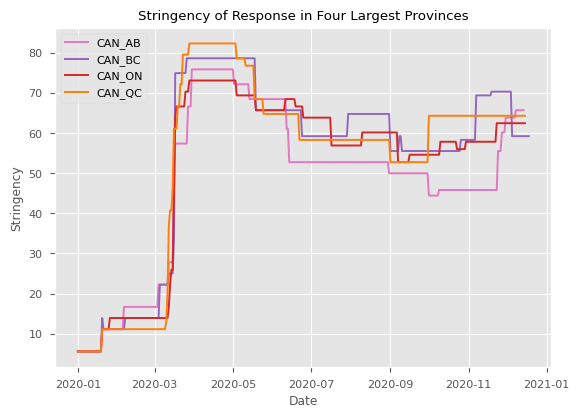

In [ ]:
colors=['tab:pink','tab:purple','tab:red','tab:orange']
i=0
for region in can['RegionCode'].unique():
    if region not in ['CAN_BC', 'CAN_AB', 'CAN_QC', 'CAN_ON']:
        continue
        
    region_df = can[can['RegionCode'] == region]
    plt.plot(region_df['Date'], region_df['StringencyIndex'], label=region, color=colors[i])
    i = i + 1
    
plt.title('Stringency of Response in Four Largest Provinces')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stringency')
plt.savefig('figures/four-largest-stringency.png')

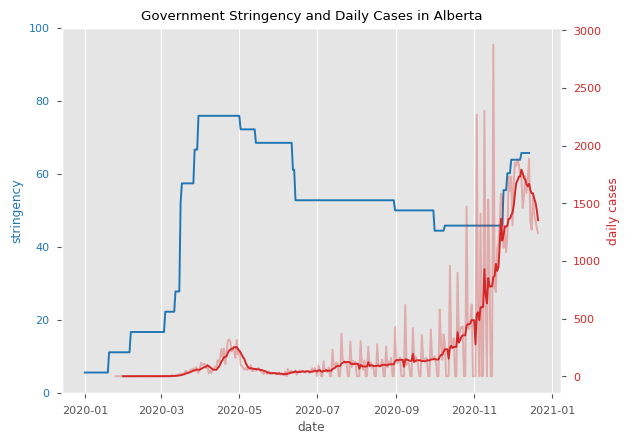

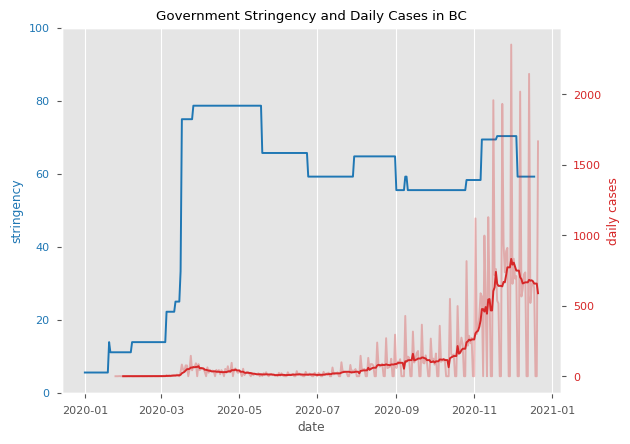

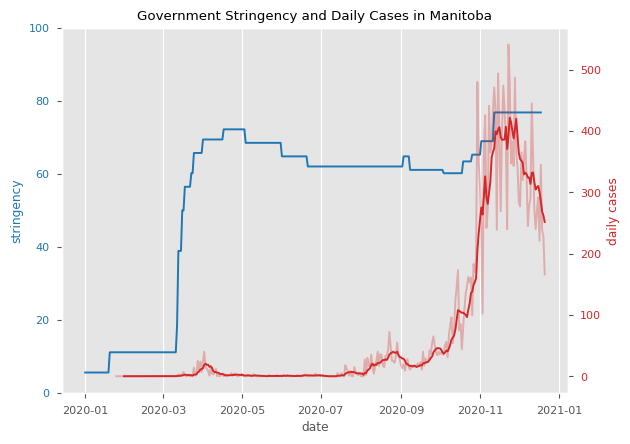

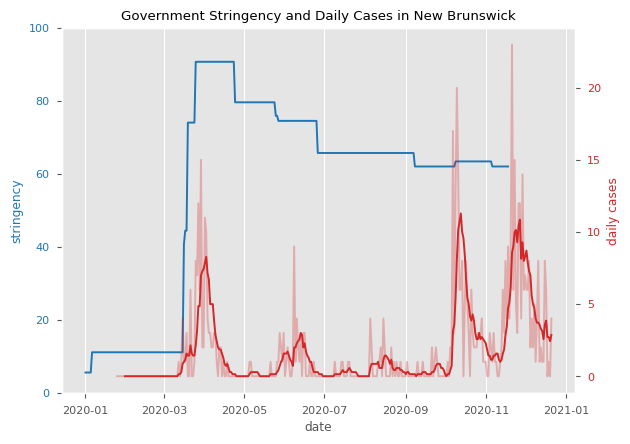

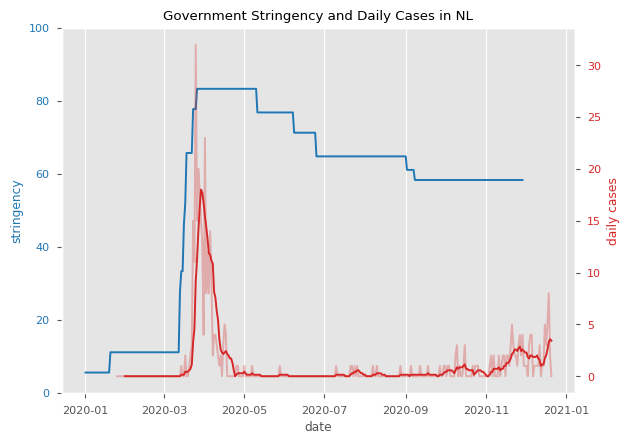

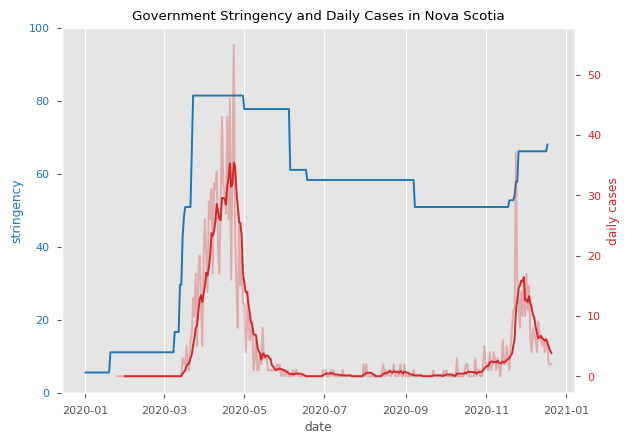

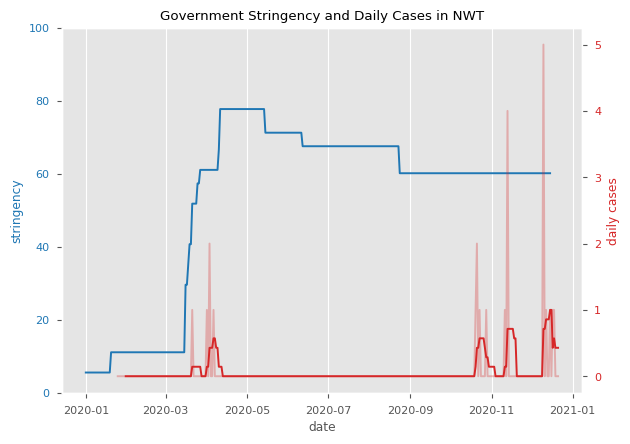

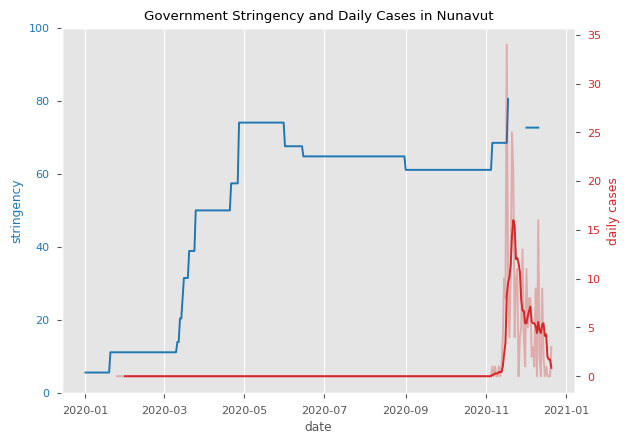

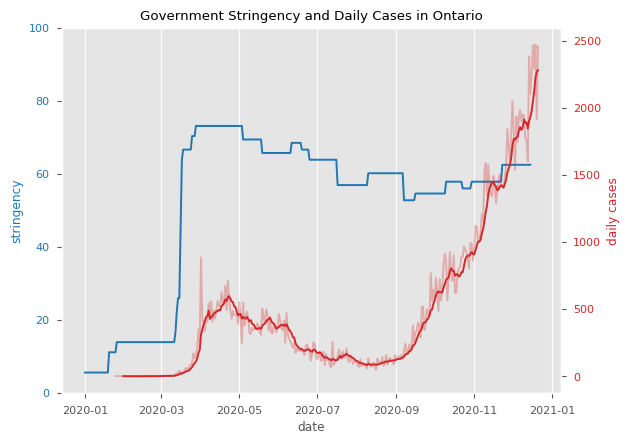

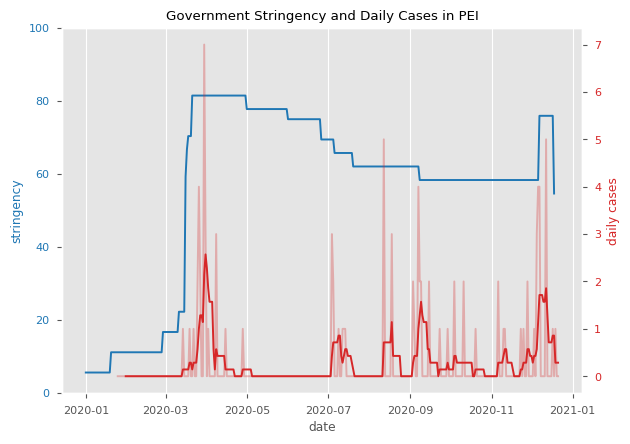

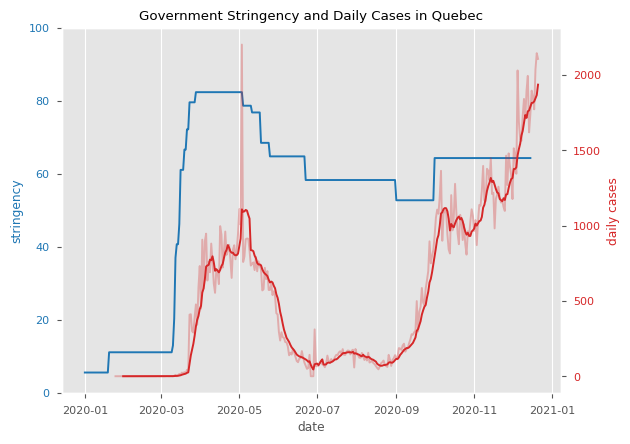

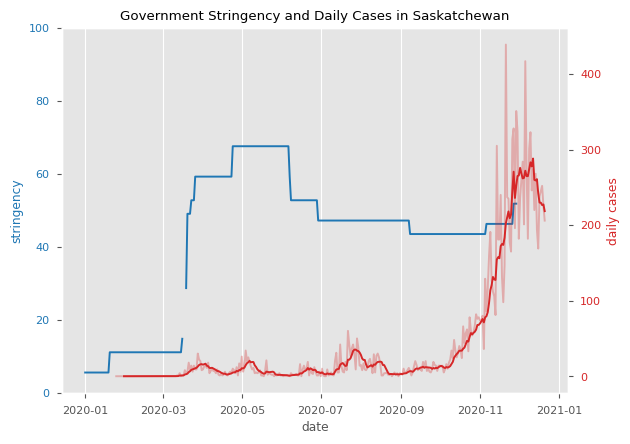

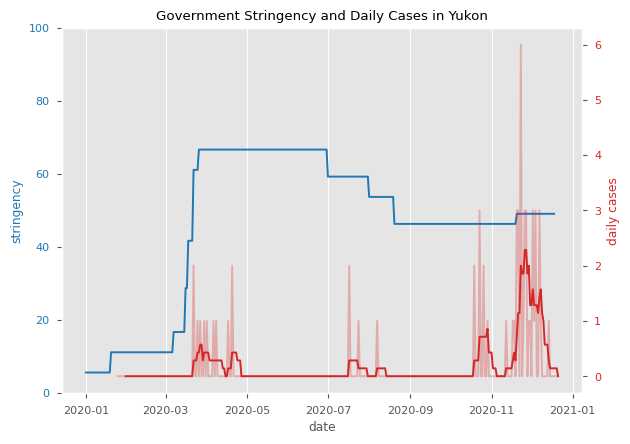

In [ ]:

for region in can['RegionCode'].unique():
  if pd.isnull(region):
    continue
  case_region_name = prov_code_map[region]

  region_df = can[can['RegionCode'] == region]
  #plt.plot()

  cases_df = prov_cases_df[prov_cases_df['province'] == case_region_name]
  #plt.plot(cases_df['date_report'], cases_df['cases'], label=region)

  fig, ax1 = plt.subplots()

  color = 'tab:blue'
  ax1.set_xlabel('date')
  ax1.set_ylabel('stringency', color=color)
  ax1.plot(region_df['Date'], region_df['StringencyIndex'], label=region, color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.set_ylim(0, 100)
  ax1.grid(False, axis='y') # turn off grid
  #ax1.grid(False)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  # Turns off grid on the secondary (right) Axis.
  ax2.grid(False, axis='y')
  #ax2.grid(False)


  color = 'tab:red'
  color2 = 'tab:red'
  ax2.set_ylabel('daily cases', color=color2)  # we already handled the x-label with ax1
  ax2.plot(cases_df['date_report'], cases_df['cases'], label=region, color=color, alpha=0.3)
  ax2.plot(cases_df['date_report'], cases_df['cases'].rolling(7).mean(), label=region+' 7d rol', color=color2)
  ax2.tick_params(axis='y', labelcolor=color2)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title('Government Stringency and Daily Cases in ' + case_region_name)
  plt.show()
  fig.savefig('figures/'+region+'_stringency_cases.png')

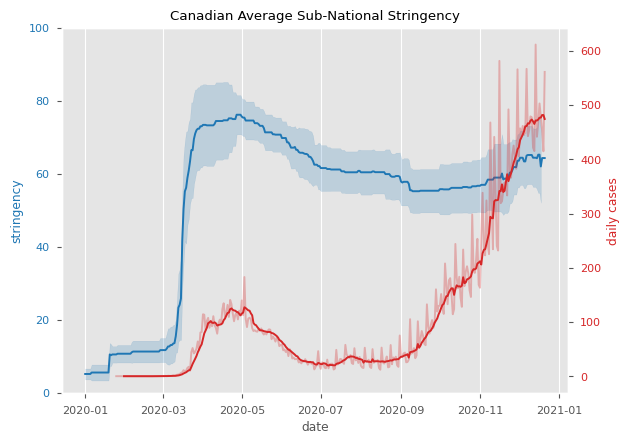

In [ ]:
# Mean stringency
#can_stringency_mean
mean_cases = prov_cases_df.groupby(by='date_report')['cases'].mean()

mean_stringency = can.groupby(by='Date')['StringencyIndex'].mean()
std_stringency = can.groupby(by='Date')['StringencyIndex'].std()

lower_bound = mean_stringency.values - std_stringency.values
upper_bound = mean_stringency.values + std_stringency.values


fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('stringency', color=color)


ax1.fill_between(mean_stringency.index, lower_bound, upper_bound,
                 color=color, alpha=0.2)
ax1.plot(mean_stringency.index, mean_stringency.values, label='Mean Stringency', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 100)
ax1.grid(False, axis='y') # turn off grid
#ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Turns off grid on the secondary (right) Axis.
ax2.grid(False, axis='y')
#ax2.grid(False)

color = 'tab:red'
color2 = 'tab:red'
ax2.set_ylabel('daily cases', color=color2)  # we already handled the x-label with ax1
ax2.plot(mean_cases.index, mean_cases.values, label=region, color=color, alpha=0.3)
ax2.plot(mean_cases.index, mean_cases.rolling(7).mean(), label=' 7d rol', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Canadian Average Sub-National Stringency')
plt.show()
fig.savefig('figures/canada_avg_stringency.png')


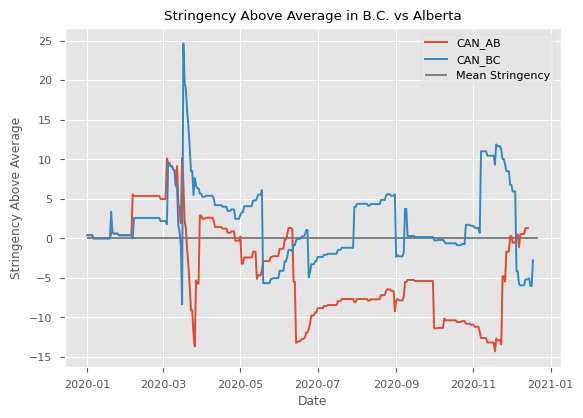

In [ ]:

for region in can['RegionCode'].unique():
    if region not in ['CAN_BC', 'CAN_AB']:
        continue
        
    region_df = can[can['RegionCode'] == region]
    stringency_over_mean = region_df['StringencyIndex'].values - mean_stringency.values
    plt.plot(region_df['Date'], stringency_over_mean, label=region)
    
plt.hlines(0, region_df['Date'].min(), region_df['Date'].max(), colors='grey', label='Mean Stringency')
plt.title('Stringency Above Average in B.C. vs Alberta')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stringency Above Average')
plt.savefig('figures/stringency_above_average_bc_ab.png')

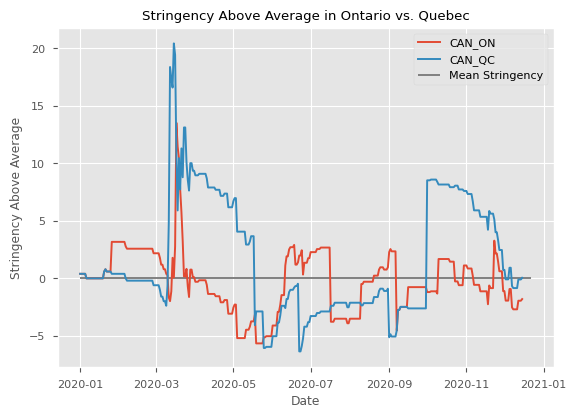

In [ ]:

for region in can['RegionCode'].unique():
    if region not in ['CAN_ON', 'CAN_QC']:
        continue
        
    region_df = can[can['RegionCode'] == region]
    stringency_over_mean = region_df['StringencyIndex'].values - mean_stringency.values
    plt.plot(region_df['Date'], stringency_over_mean, label=region)
    
plt.hlines(0, region_df['Date'].min(), region_df['Date'].max(), colors='grey', label='Mean Stringency')
plt.title('Stringency Above Average in Ontario vs. Quebec')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stringency Above Average')
plt.savefig('figures/stringency_above_average_on_qc.png')

Text(0, 0.5, 'Stringency Above Normal')

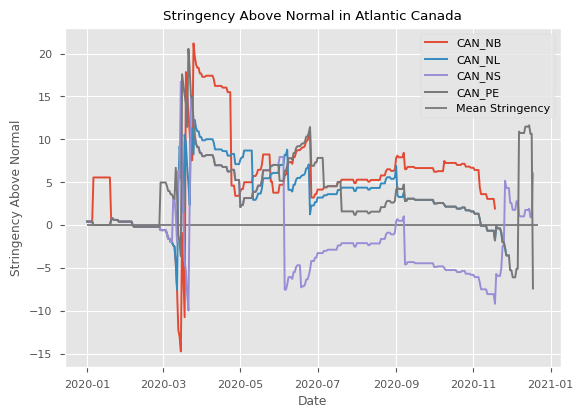

In [ ]:

for region in can['RegionCode'].unique():
    if region not in ['CAN_NB', 'CAN_NL', 'CAN_NS', 'CAN_PE']:
        continue
        
    region_df = can[can['RegionCode'] == region]
    stringency_over_mean = region_df['StringencyIndex'].values - mean_stringency.values
    plt.plot(region_df['Date'], stringency_over_mean, label=region)
    
plt.hlines(0, region_df['Date'].min(), region_df['Date'].max(), colors='grey', label='Mean Stringency')
plt.title('Stringency Above Normal in Atlantic Canada')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stringency Above Normal')

Text(0, 0.5, 'Stringency Above Normal')

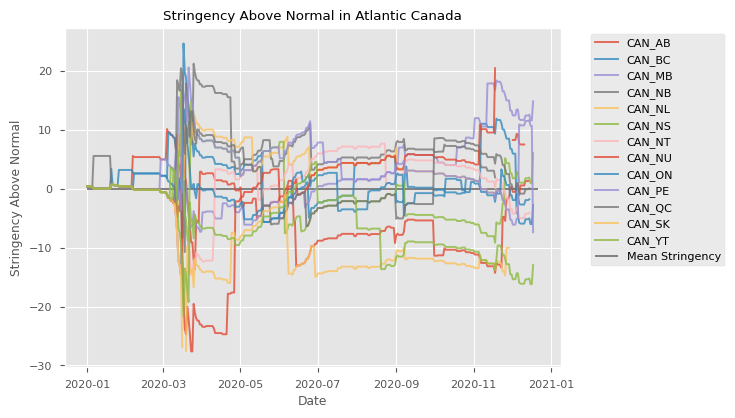

In [ ]:

for region in can['RegionCode'].unique():
    #if region not in ['CAN_NB', 'CAN_NL', 'CAN_NS', 'CAN_PE']:
    #    continue
    if pd.isnull(region):
        continue
        
    region_df = can[can['RegionCode'] == region]
    stringency_over_mean = region_df['StringencyIndex'].values - mean_stringency.values
    plt.plot(region_df['Date'], stringency_over_mean, label=region, alpha=0.8)
    
plt.hlines(0, region_df['Date'].min(), region_df['Date'].max(), colors='grey', label='Mean Stringency')
plt.title('Stringency Above Normal in Atlantic Canada')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Date')
plt.ylabel('Stringency Above Normal')


# Containment, Economic, Health

Splits by kinds of interventions

In [ ]:
region_df['ContainmentHealthIndex']

23562    3.85
23563    3.85
23564    3.85
23565    3.85
23566    3.85
         ... 
23914     NaN
23915     NaN
23916     NaN
23917     NaN
23918     NaN
Name: ContainmentHealthIndex, Length: 357, dtype: float64

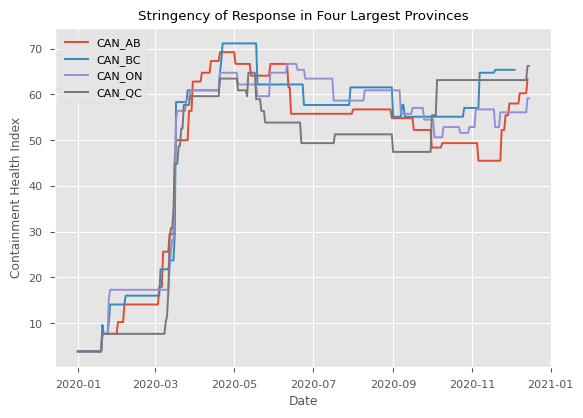

In [ ]:
for region in can['RegionCode'].unique():
    if region not in ['CAN_BC', 'CAN_AB', 'CAN_QC', 'CAN_ON']:
        continue
        
    region_df = can[can['RegionCode'] == region]
    plt.plot(region_df['Date'], region_df['ContainmentHealthIndex'], label=region)
    
plt.title('Stringency of Response in Four Largest Provinces')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Containment Health Index')
plt.savefig('figures/four-largest-stringency.png')

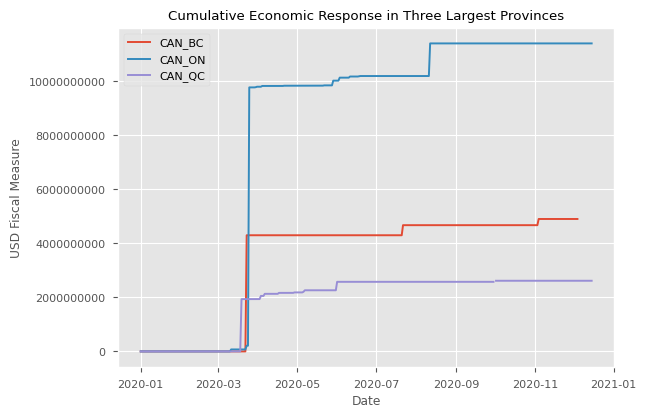

In [ ]:
fig, ax = plt.subplots()
#ax.plot(range(2003,2012,1),range(200300,201200,100))

for region in can['RegionCode'].unique():
    if region not in ['CAN_QC', 'CAN_ON', 'CAN_BC']:
        continue
        
    region_df = can[can['RegionCode'] == region]
    ax.plot(region_df['Date'], region_df['E3_Fiscal measures'].cumsum(), label=region)
    
ax.ticklabel_format(axis='y', style='plain')

plt.title('Cumulative Economic Response in Three Largest Provinces')
plt.legend()
plt.xlabel('Date')
plt.ylabel('USD Fiscal Measure')
fig.savefig('figures/three-largest-econ.png')

In [ ]:
!tar -zcvf figures.tar.gz figures

figures/
figures/CAN_NL_stringency_cases.png
figures/CAN_QC_stringency_cases.png
figures/CAN_PE_stringency_cases.png
figures/CAN_AB_stringency_cases.png
figures/CAN_NU_stringency_cases.png
figures/stringency_above_average.png
figures/CAN_NS_stringency_cases.png
figures/CAN_BC_stringency_cases.png
figures/stringency_above_average_bc_ab.png
figures/CAN_MB_stringency_cases.png
figures/CAN_ON_stringency_cases.png
figures/CAN_NT_stringency_cases.png
figures/CAN_SK_stringency_cases.png
figures/CAN_NB_stringency_cases.png
figures/stringency_above_average_on_qc.png
figures/canada_avg_stringency.png
figures/CAN_YT_stringency_cases.png
